<a href="https://colab.research.google.com/github/Hrushi1812/Technical-indicators/blob/main/Technical_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Technical Indicators**:


In [71]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [72]:
def get_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

**Simple Moving average(SMA):-**

A trend-following indicator that calculates the average of a specified number of closing prices, providing a smoothed representation of price movements over a defined period.

$SMA = \frac{A_1 + A_2 + \ldots + A_n}{n}$

where:

\begin{align*}
SMA & : \text{Simple Moving Average} \\
A_i & : \text{Average in period } i \text{ for } 1 \leq i \leq n \\
n & : \text{Number of time periods}
\end{align*}



In [73]:
def calculate_sma(data, window):
    return data['Close'].rolling(window=window).mean()

**Exponential Moving Average (EMA):-**

A type of moving average that assigns more weight to recent prices, offering a faster response to price changes compared to the SMA.

$ EMA_t = V_t \cdot (1 + \frac{1}{d_s}) + EMA_y \cdot (1 - \frac{1}{d_s}) $


where:

\begin{align*}
EMA_t & : \text{EMA today} \\
V_t & : \text{Value today} \\
EMA_y & : \text{EMA yesterday} \\
s & : \text{Smoothing} \\
d & : \text{Number of days}
\end{align*}


In [74]:
def calculate_ema(data, span):
    return data['Close'].ewm(span=span, adjust=False).mean()

In [75]:
symbol = 'IOC.NS'
start_date = '2023-01-01'
end_date = '2024-01-01'

In [76]:
stock_data = get_stock_data(symbol, start_date, end_date)
stock_data['SMA'] = calculate_sma(stock_data, window=20)
stock_data['EMA'] = calculate_ema(stock_data, span=20)

[*********************100%%**********************]  1 of 1 completed


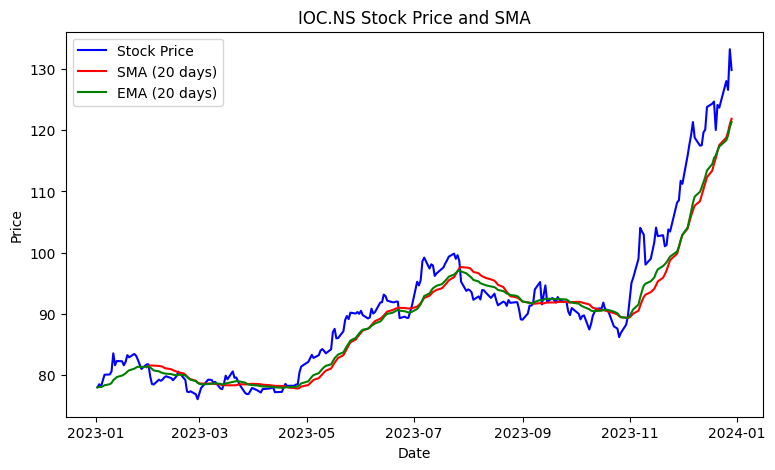

In [77]:
plt.figure(figsize=(9, 5))
plt.plot(stock_data['Close'], label='Stock Price', color='blue')
plt.plot(stock_data['SMA'], label='SMA (20 days)', color='red')
plt.plot(stock_data['EMA'], label='EMA (20 days)', color='green')
plt.title(f'{symbol} Stock Price and SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Moving Average Convergence Divergence (MACD):-**

 A trend-following momentum indicator that reveals the relationship between two moving averages of an asset's price, consisting of a MACD line, signal line, and histogram, aiding in identifying potential trend reversals and strength.







**MACD** = *12-Period EMA* - *26-Period EMA*


In [78]:
def calculate_macd(data, short_window, long_window, signal_window):
    short_ema = calculate_ema(data, short_window)
    long_ema = calculate_ema(data, long_window)
    data['MACD'] = short_ema - long_ema
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    data['Histogram'] = data['MACD'] - data['Signal_Line']

In [79]:
stock_data = get_stock_data(symbol, start_date, end_date)
calculate_macd(stock_data, short_window=12, long_window=26, signal_window=9)

[*********************100%%**********************]  1 of 1 completed


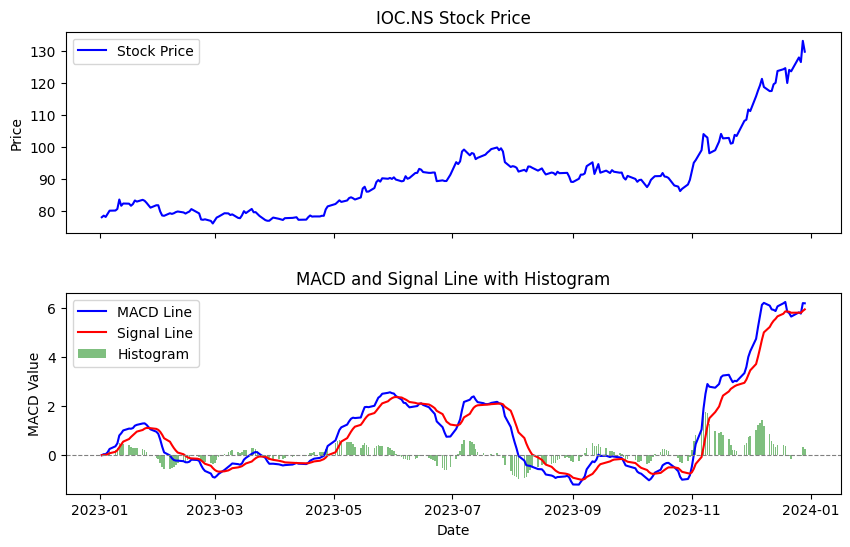

In [80]:
# Plotting MACD
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'hspace': 0.3})  # Adjust hspace for separation

# Upper panel for stock price
axs[0].plot(stock_data['Close'], label='Stock Price', color='blue')
axs[0].set_title(f'{symbol} Stock Price')
axs[0].set_ylabel('Price')
axs[0].legend()

# Lower panel for MACD, Signal Line, and Histogram
axs[1].plot(stock_data['MACD'], label='MACD Line', color='blue')
axs[1].plot(stock_data['Signal_Line'], label='Signal Line', color='red')
axs[1].bar(stock_data.index, stock_data['Histogram'], label='Histogram', color='green', alpha=0.5)
axs[1].axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add zero line for reference
axs[1].set_title('MACD and Signal Line with Histogram')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('MACD Value')
axs[1].legend()

**Relative Strength Index(RSI):-**

 A momentum oscillator that measures the speed and change of price movements, indicating overbought or oversold conditions and potential trend reversal points.

$$
RSI = 100 - \frac{100}{1 + \frac{\text{Average loss}}{\text{Average gain}}}
$$

In [81]:
def calculate_rsi(data, window):
    price_diff = data['Close'].diff()
    gain = price_diff.where(price_diff > 0, 0)
    loss = -price_diff.where(price_diff < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

In [82]:
stock_data = get_stock_data(symbol, start_date, end_date)
calculate_rsi(stock_data, window=14)

[*********************100%%**********************]  1 of 1 completed


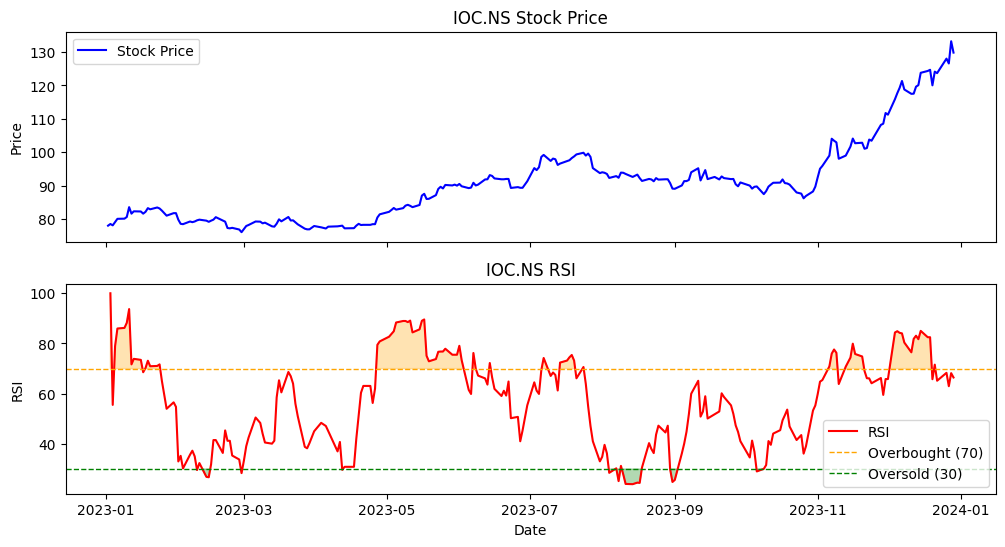

In [83]:
# Plotting RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Plotting Stock Price
ax1.plot(stock_data['Close'], label='Stock Price', color='blue')
ax1.set_title(f'{symbol} Stock Price')
ax1.set_ylabel('Price')
ax1.legend()

# Plotting RSI
ax2.plot(stock_data['RSI'], label='RSI', color='red')
ax2.axhline(70, color='orange', linestyle='--', linewidth=1, label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')

# Fill between regions for Overbought and Oversold
ax2.fill_between(stock_data.index, 70, stock_data['RSI'], where=stock_data['RSI'] > 70, interpolate=True, color='orange', alpha=0.3)
ax2.fill_between(stock_data.index, 30, stock_data['RSI'], where=stock_data['RSI'] < 30, interpolate=True, color='green', alpha=0.3)

ax2.set_title(f'{symbol} RSI')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()

plt.show()

**Bollinger Bands:-**

 Volatility indicators that consist of a middle band being an SMA and upper/lower bands representing a certain number of standard deviations away, helping identify potential reversal points and volatility changes.

\
\begin{align*}
BOLU & = \text{MA}(TP, n) + m \times \sigma[TP, n] \\
BOLD & = \text{MA}(TP, n) - m \times \sigma[TP, n]
\end{align*}


where:
\begin{align*}
BOLU & : \text{Upper Bollinger Band} \\
BOLD & : \text{Lower Bollinger Band} \\
\text{MA} & : \text{Moving average} \\
TP & : \text{Typical price} = \frac{{\text{High} + \text{Low} + \text{Close}}}{3} \\
n & : \text{Number of days in smoothing period (typically 20)} \\
m & : \text{Number of standard deviations (typically 2)} \\
\sigma[TP, n] & : \text{Standard Deviation over the last } n \text{ periods of } TP
\end{align*}



In [84]:
def calculate_bollinger_bands(data, window, num_std_dev=2):
    sma = data['Close'].rolling(window=window).mean()
    std = data['Close'].rolling(window=window).std()
    upper_band = sma + (num_std_dev * std)
    lower_band = sma - (num_std_dev * std)
    data['Upper_Band'] = upper_band
    data['Lower_Band'] = lower_band

In [85]:
stock_data = get_stock_data(symbol, start_date, end_date)
calculate_bollinger_bands(stock_data, window=20)

[*********************100%%**********************]  1 of 1 completed


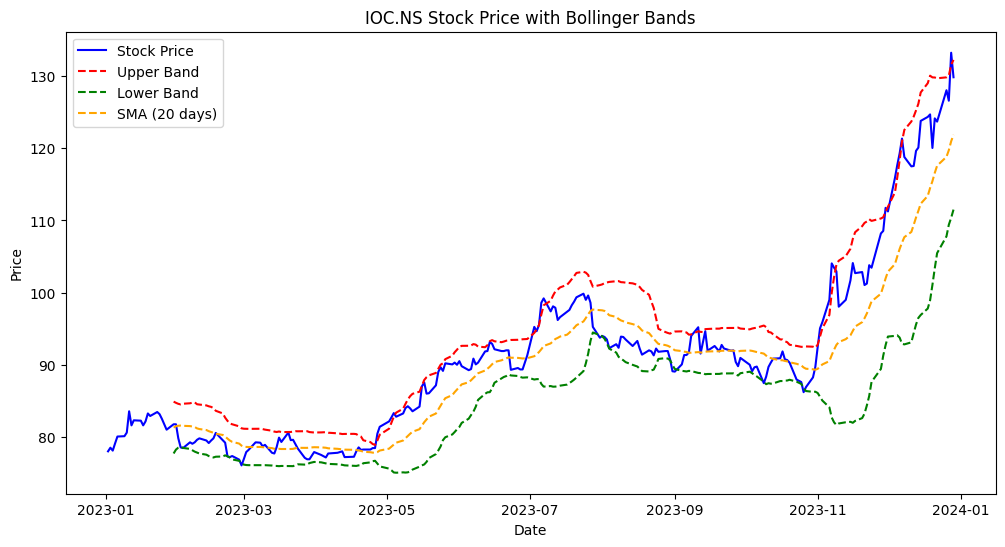

In [86]:
# Plotting Stock Price with Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Stock Price', color='blue')
plt.plot(stock_data['Upper_Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(stock_data['Lower_Band'], label='Lower Band', color='green', linestyle='--')
plt.plot(stock_data['Close'].rolling(window=20).mean(), label='SMA (20 days)', color='orange', linestyle='--')
plt.title(f'{symbol} Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()